## Homework #5. Exploratory Data Analysis
#### Author: PAVLO YASHCHENKO
#### Total time spent on h/w (in minutes): 500

In [2]:
import pandas as pd

In [3]:
DIALOGS_MERGED_DATA_PATH = "D:/data/merged_data/dialogs_data_all.csv"
DIALOGS_META_MERGED_DATA_PATH = "D:/data/merged_data/dialogs_users_all.csv"

In [4]:
DIALOGS_MERGED_DATA_AND_USERS_PATH = "D:/data/merged_data/dialogs_data_and_users_merged.csv"

In [24]:

df = pd.read_csv(DIALOGS_MERGED_DATA_PATH, low_memory=False)


In [5]:
df_meta = pd.read_csv(DIALOGS_META_MERGED_DATA_PATH)

In [26]:
df.drop(df[df['type'] != "voice"].index, inplace = True)

In [29]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import datetime as dt

In [30]:
r = df.groupby(['date'])['id'].count().to_frame()



# Question

## 1) when do people send voice messages most often?(to determine when people ususally too busy to write normally)

To answer it, I need to overlap all the dates onto a graph with a day hours<br>
Not sure how to do it, though<br>


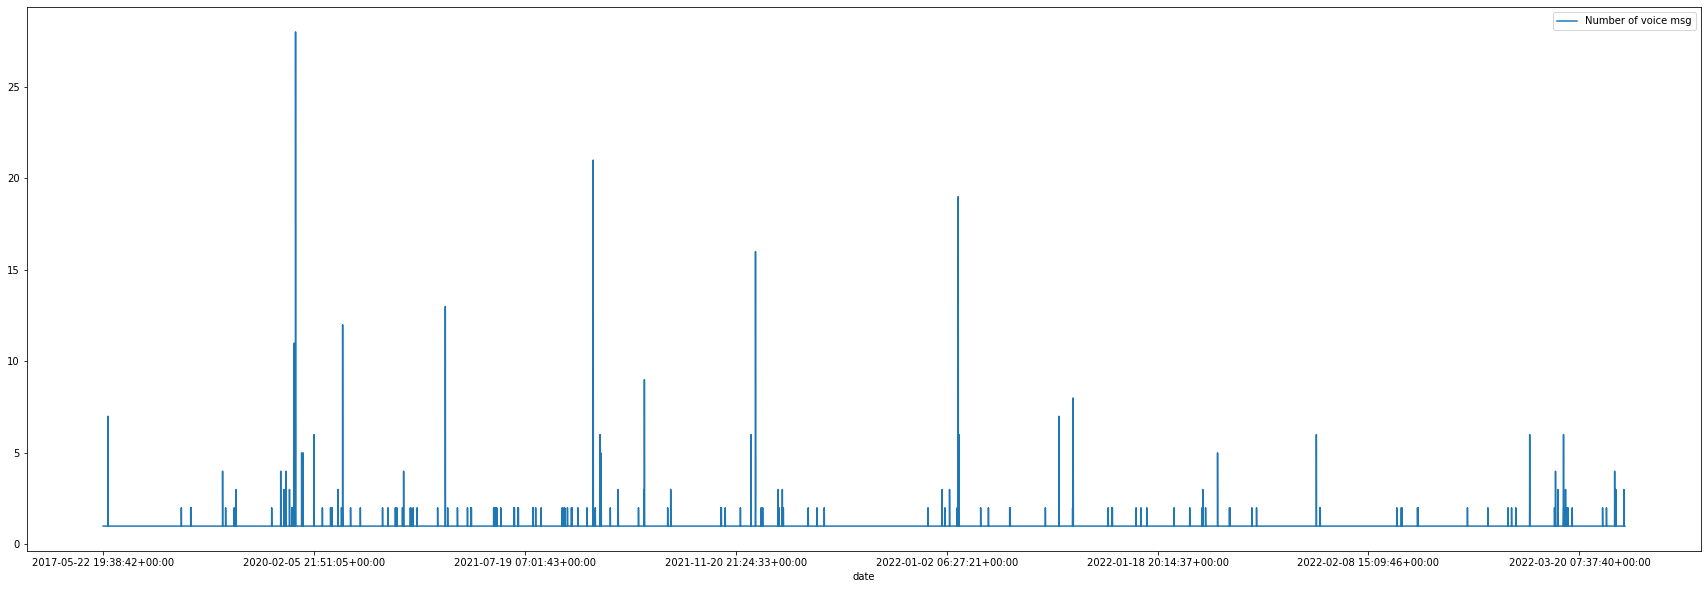

In [31]:
r.plot(figsize=(30,10))
plt.legend(["Number of voice msg"]);

<blockquote>Here's a dataframe with number of voice messages by date, at least something</blockquote>

In [7]:
usr = df_meta.loc[:, "users"].to_frame()

In [35]:
str_df = usr['users'].str.split(expand=True).reindex(columns=np.arange(6)).add_prefix('users')

In [11]:
str_df = str_df.drop(labels=['users0', 'users2', 'users4'], axis=1)

In [12]:

str_df.rename(columns = {'users1':'user_id', 'users3':'first_name', 'users5':'last_name'}, inplace = True)

In [14]:

str_df["last_name"] = str_df["last_name"].replace("'last_name'", None, regex=True)


In [15]:
str_df = str_df.drop_duplicates()


In [17]:
nameCount = str_df["first_name"].value_counts().to_frame()


In [19]:
nameCount.sort_values('first_name', ascending = False)

,first_name
"'Anna',",64
"'Anastasiia',",51
"'Daria',",40
"'Anastasia',",35
"'Maria',",33
...,...
"'Grigory',",1
'🐛,1
"'Nickolay',",1
"'Паляниця',",1


In [40]:
dropLeast  = nameCount.drop(nameCount[nameCount.first_name < 10].index)

# QUESTION

## 2) get the most common names
There's still a lot to be done to answer it<br>
For example, different forms and spellings of a name must be counted as one


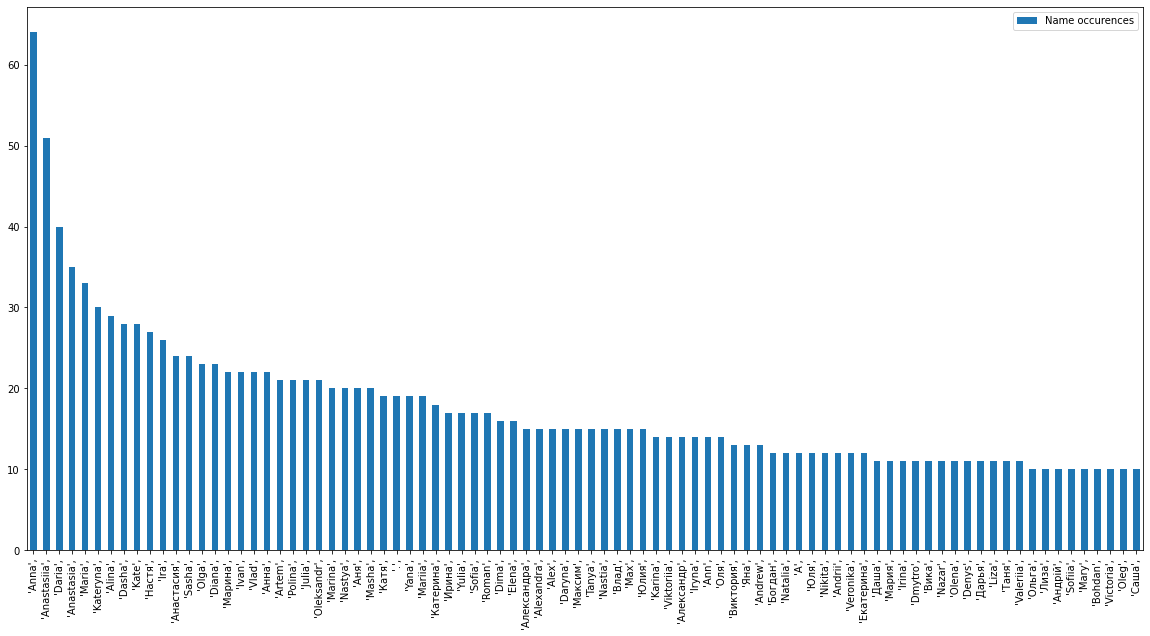

In [23]:
dropLeast.plot(kind = 'bar', figsize = (20, 10))
plt.legend(["Name occurences"]);



<blockquote>But here's a graph of names that occured <i>more than 10 times</i>, at least</blockquote>